## Mount google drive & Importing the libraries

In [ ]:
#mount google drive 
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Project/Sentiment Analysis of Anime Reviews/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Anime Reviews.xlsx'  'Sentimental Analysis.ipynb'


In [ ]:
pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import re
from  wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
# Commentfile Load
file_CommentsDataSet01 = "/content/drive/My Drive/Project/Sentiment Analysis of Anime Reviews/Data/Anime Reviews.xlsx"
df = pd.read_excel(file_CommentsDataSet01)
print(df.shape)

(31994, 6)


In [ ]:
df.head()

S.no                                              Title         Date  \
0     1               Kage no Jitsuryokusha ni Naritakute!  Feb 8, 2023   
1     2  Maou Gakuin no Futekigousha: Shijou Saikyou no...  Feb 8, 2023   
2     3                                   Pumpkin Scissors  Feb 8, 2023   
3     4               Kage no Jitsuryokusha ni Naritakute!  Feb 8, 2023   
4     5                                    Tian Guan Ci Fu  Feb 8, 2023   

             User          Tag  \
0     Ishinashi40  Recommended   
1        Crimeful          NaN   
2     GenghisAres          NaN   
3  The_Alpha_King  Recommended   
4         Himei25          NaN   

                                                text  
0  Don't drop this anime after the first episodes...  
1  Season 1 was excellent and I loved it. However...  
2  This is a pretty decent show that is ultimatel...  
3  I will say I can see how a lot of people can n...  
4  i just watched it this year, it's a really imp...

## Cleaning Comments

In [ ]:
#Clean the text

#Create a function to clean the tweets

def cleanTxt(text):
   text = re.sub(r'@[A-Za-z0-9]+','', text) # Removed @mentions 
   text = re.sub(r'#','', text) #Removing the '#' symbol
   text= re.sub (r'RT[\s]+','', text) # Removing RT
   text= re.sub(r'https?:\/\/\S+','', text) # Remove the hyper link
   return text

#Cleaning the text

df[ 'text']= df[ 'text'].apply(cleanTxt)

#Show the cleaned text
df.head()

S.no                                              Title         Date  \
0     1               Kage no Jitsuryokusha ni Naritakute!  Feb 8, 2023   
1     2  Maou Gakuin no Futekigousha: Shijou Saikyou no...  Feb 8, 2023   
2     3                                   Pumpkin Scissors  Feb 8, 2023   
3     4               Kage no Jitsuryokusha ni Naritakute!  Feb 8, 2023   
4     5                                    Tian Guan Ci Fu  Feb 8, 2023   

             User          Tag  \
0     Ishinashi40  Recommended   
1        Crimeful          NaN   
2     GenghisAres          NaN   
3  The_Alpha_King  Recommended   
4         Himei25          NaN   

                                                text  
0  Don't drop this anime after the first episodes...  
1  Season 1 was excellent and I loved it. However...  
2  This is a pretty decent show that is ultimatel...  
3  I will say I can see how a lot of people can n...  
4  i just watched it this year, it's a really imp...

## Adding Subjectivity and Polarity

In [ ]:
# Create a function to get the subjectivity 
def getSubjectivity (text): 
  return TextBlob (text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity (text): 
  return TextBlob (text).sentiment.polarity

#Create two new columns

df[ 'Subjectivity'] = df['text'].apply(getSubjectivity) 
df[ 'Polarity'] = df['text'].apply(getPolarity)

#Show the new dataframe with the new columns

df

S.no                                              Title          Date  \
0          1               Kage no Jitsuryokusha ni Naritakute!   Feb 8, 2023   
1          2  Maou Gakuin no Futekigousha: Shijou Saikyou no...   Feb 8, 2023   
2          3                                   Pumpkin Scissors   Feb 8, 2023   
3          4               Kage no Jitsuryokusha ni Naritakute!   Feb 8, 2023   
4          5                                    Tian Guan Ci Fu   Feb 8, 2023   
...      ...                                                ...           ...   
31989  31990                                Peach Boy Riverside  Sep 16, 2021   
31990  31991                                       Black Clover  Sep 16, 2021   
31991  31992                                 Gakuen Babysitters  Sep 16, 2021   
31992  31993      Kidou Senshi Gundam Thunderbolt: December Sky  Sep 16, 2021   
31993  31994                                      Akudama Drive  Sep 16, 2021   

                  User          Tag  \
0          Ishinashi40  Recommended   
1             Crimeful          NaN   
2          GenghisAres          NaN   
3       The_Alpha_King  Recommended   
4              Himei25          NaN   
...                ...          ...   
31989     TotalCadenza          NaN   
31990          Dransyo  Recommended   
31991    giraffenanime  Recommended   
31992         ulthtwac  Recommended   
31993  UltraReviewShow          NaN   

                                                    text  Subjectivity  \
0      Don't drop this anime after the first episodes...      0.541204   
1      Season 1 was excellent and I loved it. However...      0.568750   
2      This is a pretty decent show that is ultimatel...      0.531635   
3      I will say I can see how a lot of people can n...      0.564892   
4      i just watched it this year, it's a really imp...      0.654545   
...                                                  ...           ...   
31989  Like what everyone else says, this decently-wr...      0.453968   
31990  Black Clover is an enigma, it get's dunked on ...      0.498984   
31991  I needed a feel good anime... and ohhh boy, di...      0.602912   
31992  Gundam Thunderbolt is the most enjoyable time ...      0.476049   
31993  At first it was a dumb action anime with a sci...      0.492135   

       Polarity  
0      0.316204  
1      0.198958  
2      0.047853  
3      0.149423  
4      0.488636  
...         ...  
31989  0.087698  
31990  0.134350  
31991  0.242782  
31992  0.144464  
31993  0.035417  

[31994 rows x 8 columns]

## Plotting word cloud

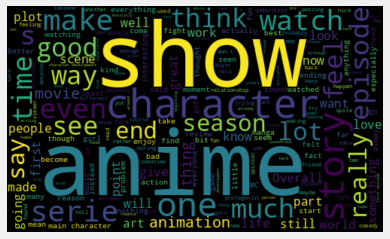

In [ ]:
allwords = ' '.join( [twts for twts in df[ 'text']] )
word_Cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(word_Cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

## Createing a function to compute the negative, neutral and positive analysis

In [ ]:
def getAnalysis (score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#Show the dataframe

df

S.no                                              Title          Date  \
0          1               Kage no Jitsuryokusha ni Naritakute!   Feb 8, 2023   
1          2  Maou Gakuin no Futekigousha: Shijou Saikyou no...   Feb 8, 2023   
2          3                                   Pumpkin Scissors   Feb 8, 2023   
3          4               Kage no Jitsuryokusha ni Naritakute!   Feb 8, 2023   
4          5                                    Tian Guan Ci Fu   Feb 8, 2023   
...      ...                                                ...           ...   
31989  31990                                Peach Boy Riverside  Sep 16, 2021   
31990  31991                                       Black Clover  Sep 16, 2021   
31991  31992                                 Gakuen Babysitters  Sep 16, 2021   
31992  31993      Kidou Senshi Gundam Thunderbolt: December Sky  Sep 16, 2021   
31993  31994                                      Akudama Drive  Sep 16, 2021   

                  User          Tag  \
0          Ishinashi40  Recommended   
1             Crimeful          NaN   
2          GenghisAres          NaN   
3       The_Alpha_King  Recommended   
4              Himei25          NaN   
...                ...          ...   
31989     TotalCadenza          NaN   
31990          Dransyo  Recommended   
31991    giraffenanime  Recommended   
31992         ulthtwac  Recommended   
31993  UltraReviewShow          NaN   

                                                    text  Subjectivity  \
0      Don't drop this anime after the first episodes...      0.541204   
1      Season 1 was excellent and I loved it. However...      0.568750   
2      This is a pretty decent show that is ultimatel...      0.531635   
3      I will say I can see how a lot of people can n...      0.564892   
4      i just watched it this year, it's a really imp...      0.654545   
...                                                  ...           ...   
31989  Like what everyone else says, this decently-wr...      0.453968   
31990  Black Clover is an enigma, it get's dunked on ...      0.498984   
31991  I needed a feel good anime... and ohhh boy, di...      0.602912   
31992  Gundam Thunderbolt is the most enjoyable time ...      0.476049   
31993  At first it was a dumb action anime with a sci...      0.492135   

       Polarity  Analysis  
0      0.316204  Positive  
1      0.198958  Positive  
2      0.047853  Positive  
3      0.149423  Positive  
4      0.488636  Positive  
...         ...       ...  
31989  0.087698  Positive  
31990  0.134350  Positive  
31991  0.242782  Positive  
31992  0.144464  Positive  
31993  0.035417  Positive  

[31994 rows x 9 columns]

In [ ]:
# Print all of the positive tweets

j=1
sortedDF = df.sort_values (by=['Polarity']) 
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'): 
    print(str(j) + ') '+sortedDF [ 'text'][i]) 
    print() 
    j = j+1

Streaming output truncated to the last 5000 lines.

All and all, it's really funny and a must watch if you enjoy isekai and understand satire.

1062) Most of the characters are just plain annoying, but mostly Griffith, Elisa, and Allium, Albert. Elisa is just one of those high pitched voices shy characters that seems to not have any purpose. Alium is the one guy that just hates the mc, the way he grits his teeth and whatever at the mc because he is not a noble is just straight cringe. Mc is not annoying, but he's so plain and more like a strong background character.

For some reason episode 2 wasn't too bad, but all together, I wouldn't watch this anime. Story doesn't seem too unique and looks a bit lacking in
                  ...
          the pictures.

1063) For me if I have read the source material before watching the anime I find it hard to be able to sit down and watch the anime.  It's nothing against a series just I already know what happens and unless the anime changes how it 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
The movie does not give a rat's ass about the things it throws at the viewer. It goes from one plot point to the other, see-sawing between elements. I wouldn't be surprised if someone with bipolar wrote the script for this movie because not a single aspect of the movie was explained or developed further. You're left with a blank face at the end of the credits with one question in your mind: "What the fuck just happened?"
And to make matters worse, the characters are absolute dogshit. The director literally took cookie-cutter personalities and copy-pasted them into the script. I don't know how much more basic you can get with how they're written, their backstories, and their interactions.
From the very first minute to the last, it oozes mediocrity. Animation-wise, there's nothing noteworthy here. A big-budget anime film by Netflix is bound to look at least good, but the only thing that could save a story this boring was beautiful animat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




9940) this is the first anime i watch that surrounds about horse racing and the characters training to be a jockey. i think it is somewhat an enjoyable anime but i think it could have been better if it has been expanded and developed further.

like for example, it feels very fast-paced with the one year later, six months later etc. you totally don't know what has happen in between to reach that part. also, there isn't much about the each and every character's background to understand why they want to be a jockey.

overall, i think it would be better if it had focus more on their
                  ...
          training in school, like how each of their lesson helps them in being a jockey etc. like some episodes feels more focus on the character's personal issues than the actual plot but with only 13 episodes, it feels a wee bit redundant.

9941) Shinji is one of the most frustrating protagonists ever. Maybe because he is exceptionally unrelatable (to me) or because I, consciously or s

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

As I mentioned this was my first sports anime and if there are others that capture the team atmosphere like this, please let me know!

12124) Most recent isekai titles like to follow the "fast food" formula, and this one is no exception. This is another one of those "fast food isekai" where an overpowered main character (MC) accumulates his harem. The pacing is odd, and new villains come and go from episode to episode. 

As with all fast food isekai titles, expect to sit back and mindlessly watch the MC crushing everything in their wake while remaining ever nonchalantly uncommitted to any female character. That isn't even an issue in this anime, because the show didn't put in any effort to develop the characters to make any of them likeable.

If
                  ...
          you got nothing else to do and want to experience a fantasy power trip (and expose yourself to a healthy dose of second hand cringe), this may be an option to p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
          he reveals Liam's identity to the world" 

I'm planning to read the manga because that actually continues from where the last episode left off. The ending of the anime literally just indicated that 'yea he lives', but the manga will show what happened after Sherlock saved Liam. 

But yea this was still a good show. Definitely loved the central issue being tackled which is the divide between the social classes. I hope the ideas and lessons that the anime was showing was something the viewers understood and could learn from. 

PS. I so love Sherly and Liam, historians would say they're bestfriends when they're obviously lovers cmon

18455) So. This is only my second review, so take what I say with a pinch of salt.

It’s not very often that you would review an anime months after you finish watching it. Even though I usually rewatch anime, and judge them based off how rewatchable they are and how enjoyable the rewatch is, Taishou

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




23111) After 12 eps I can tell you that if you’ve seen the poster you know what to expect, it isn’t really Slam Dunk on ice but it also never advertised itself as that. This is aesthetically a “CGDCT” anime which in my opinion isn’t the best match for a story about hockey but it might just be strange enough to work. If the idol part of the show puts you off, first of all don’t worry i understand it but please also understand that it isn’t a bad strategy. This show isn’t made for a tradicional overseas market and seeing the success of Uma Musume
                  ...
          you can’t fault them for trying to appeal to a larger Japanese audience in a similar way and after 12 eps it only plays a small roll (for an idol show it sure has few and far in between “idol moments”)

This anime was made in collaboration with the Nikko Ice bucks, people that actually know what their talking about help made this anime and it shows. The on ice scenes are legit the slap shots, snap shots, and even

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




25776) To its credit, High School DxD - and by extension, its authors Ichiei Ishibumi and Takao Yoshioka - is very much capable of writing an informed, coherent - and most of all, fairly charming - modern fantasy story. Ishibumi and Yoshioka do an excellent job of adapting a story of otherworldy intrigue and its involvement into just a small cast of characters, each with their own charms and motives to ride along. 

Now take this premise and narrate it by a teenager so egregiously horny that his underwear sticks to him. You now have High School DxD.

When the story wants to, it can very well
                  ...
          tell a story of demonic power feuds in the backdrop of an alternate world which intersects with our own, thrown together with age-old conflicts, competing interests, and the story of just trying to keep one's head afloat when what seems like worlds are being turned upside-down. 

Our protagonist Issei Hyodo, to the contrary, has only tangential interest in any of th

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

28858) Second season of iruma, we see how he unfolds in his school life. The anime is beautiful, I don't know what it has but I love how you see the development of the characters. There is an episode full of romance and that enchanted me by God what a beautiful couple there is there, I hope that is fulfilled. Besides, at no time do you get bored, new things always happen but you want to know more about the protagonists. If you saw the first season and you are thinking of seeing the second, I don't know what you are doing right now, go and
                  ...
          watch it. If you didn't see the first season right now, watch the first one, and then this one because it's a gem, I didn't expect anything from this anime and I loved it. I am a huge fan.



En español:
Segunda temporada de iruma, vemos como se desenvuelve en su vida escolar. Es hermoso el anime , no se que tiene  pero me encanta como ves el desarrollo de los personaj

In [ ]:
# Print all of the Negative tweets

j=1
sortedDFN = df.sort_values (by = ['Polarity']) 
for i in range(0, sortedDFN.shape[0]):
  if(sortedDFN['Analysis'][i] == 'Negative'): 
    print(str(j) + ') '+sortedDFN [ 'text'][i]) 
    print() 
    j = j+1

Streaming output truncated to the last 5000 lines.
1217) I really liked the storyline. To be frank, I really wanted to complete the whole series but I just couldn't stomach the incessant/inappropriate behaviour between siblings. I think that's why I'm writing this review. I normally don't review anime /shows but this one really annoyed me because I wanted to watch it. 

A message for the writer of this script: Don't you feel sick to be creating characters sexually attracted to blood relatives? Made me want to vomit all over the floor.



Anyway good genre, story but disgusting character relations. For that reason, I stoped watching after 4th episode when I saw something that made me
                  ...
          question WTF am I watching?!

1218) This whole season so far feels like a bad filler arc.  None of the hanging plot threads from season one have been touched upon, all the characters feel like husks of themselves and the overall plot is just boring.  Also, the way it's writte

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Ploting hexbin chart based on the polarity and subjectivity 


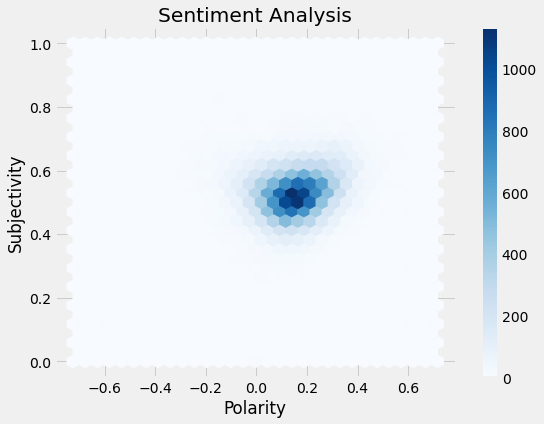

In [ ]:
plt.figure(figsize=(8,6))

plt.hexbin(df['Polarity'], df['Subjectivity'], gridsize=30, cmap='Blues')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.colorbar()
plt.show()

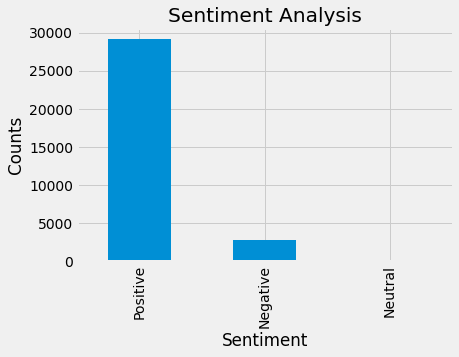

In [ ]:
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df [ 'Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#Percentage of Possitive comments
pcomments = df[df.Analysis == 'Positive']
pcomments = pcomments['text']
round ((pcomments.shape [0] / df.shape[0] *100), 1)

91.1

In [ ]:
#Percentage of negative comments
pcomments = df[df.Analysis == 'Negative']
pcomments = pcomments['text']
round ((pcomments.shape [0] / df.shape[0] *100), 1)

8.9

In [ ]:
#Types of titles in data
df['Title'].value_counts()

Cyberpunk: Edgerunners                                                                    311
Sono Bisque Doll wa Koi wo Suru                                                           295
Spy x Family                                                                              294
Chainsaw Man                                                                              247
Kimetsu no Yaiba: Yuukaku-hen                                                             227
                                                                                         ... 
Giant Robo the Animation: Chikyuu ga Seishi Suru Hi                                         1
Mob Psycho 100: Dai Ikkai Rei toka Soudansho Ian Ryokou - Kokoro Mitasu Iyashi no Tabi      1
Ansatsu Kyoushitsu: Deai no Jikan                                                           1
Twin Signal: Family Game                                                                    1
Shiawasette Naani                                           